In [23]:
# 1. Завантаження набору даних та підключення бібліотек

import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. Нормалізація та приведення в формат one hot encoding

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [25]:
# 3. Створення зготкової нейронної мережі

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD
import warnings

warnings.filterwarnings("ignore") # Відключаємо попередження

model = Sequential()

# 1. Додавання нових згорткових блоків з різними фільтрами та шарами
model.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))  # Великий розмір фільтру на першому шарі
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Другий блок
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Третій блок (опціональний)
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Шар Flatten
model.add(Flatten())

# 5. Dense шари (класифікаційна частина)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 класів для CIFAR-10

In [37]:
# 4. Компілюємо модель та навчаємо її

model.compile(loss='categorical_crossentropy',
              optimizer= SGD(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=50, 
                    epochs=15,
                    validation_data=(X_test, Y_test),
                    verbose=1)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 90s 89ms/step - accuracy: 0.8010 - loss: 0.5607 - val_accuracy: 0.7953 - val_loss: 0.6012
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 90s 90ms/step - accuracy: 0.8094 - loss: 0.5390 - val_accuracy: 0.7845 - val_loss: 0.6258
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 90s 90ms/step - accuracy: 0.8091 - loss: 0.5409 - val_accuracy: 0.7963 - val_loss: 0.5951
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - accuracy: 0.8158 - loss: 0.5196 - val_accuracy: 0.7960 - val_loss: 0.5950
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 90s 90ms/step - accuracy: 0.8179 - loss: 0.5196 - val_accuracy: 0.7935 - val_loss: 0.6003
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 90s 90ms/step - accuracy: 0.8211 - loss: 0.5059 - val_accuracy: 0.7991 - val_loss: 0.5887
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - accuracy: 0.8230 - loss: 0.5007 - val_accuracy: 0.7897 - val_loss: 0.6128
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 94s 94ms/step - accuracy: 0.8224 -

In [39]:
# 5. Оцінюємо якість навчання мережі на тестових даних

scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")

Test loss: 0.568955659866333
Test accuracy: 0.8080000281333923


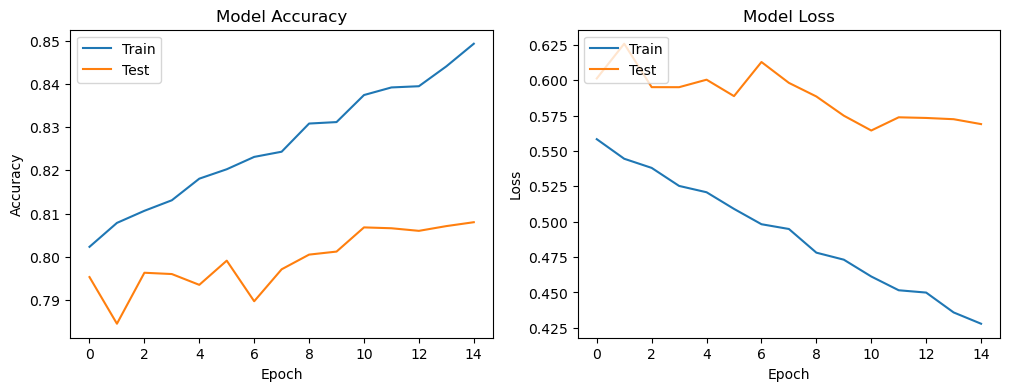

In [41]:
# 6. Візуалізація історії навчання

# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [49]:
# 8. Збереження моделі

model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model1.weights.h5")

In [55]:
# Завантаження моделі з диску

from keras.models import model_from_json

json_file = open('cifar10_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("cifar10_model1.weights.h5")
print("Модель завантажена з диска")

loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=SGD(),
                     metrics=['accuracy'])

Модель завантажена з диска


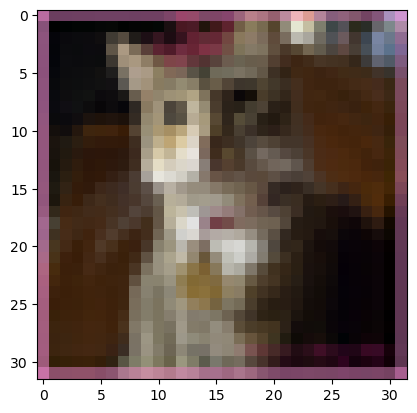

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Передбачений клас: кіт
Реальний клас: кіт
--------------------------------------------------


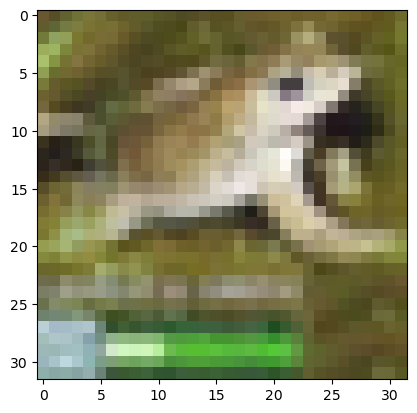

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Передбачений клас: жаба
Реальний клас: жаба
--------------------------------------------------


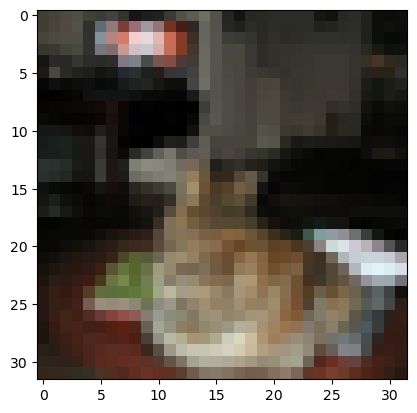

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Передбачений клас: кіт
Реальний клас: кіт
--------------------------------------------------


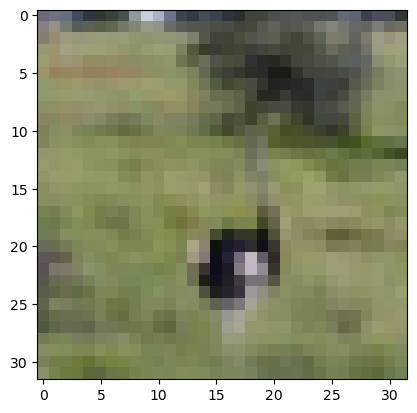

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Передбачений клас: олень
Реальний клас: птах
--------------------------------------------------


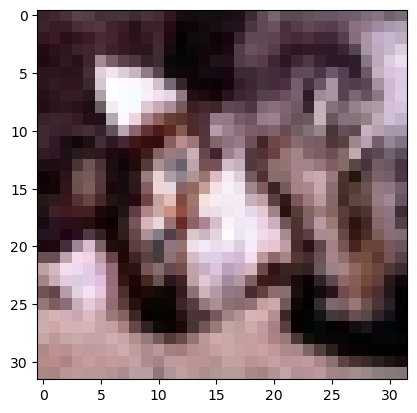

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Передбачений клас: кіт
Реальний клас: кіт
--------------------------------------------------


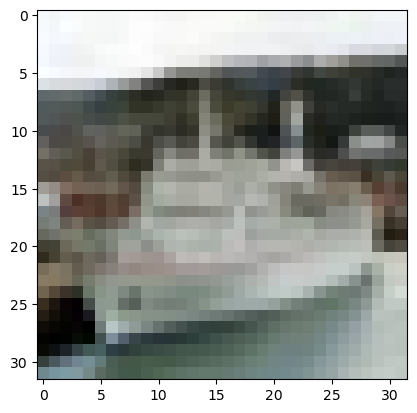

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Передбачений клас: корабель
Реальний клас: корабель
--------------------------------------------------


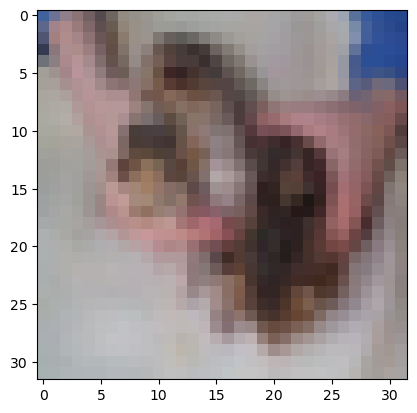

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Передбачений клас: собака
Реальний клас: кіт
--------------------------------------------------


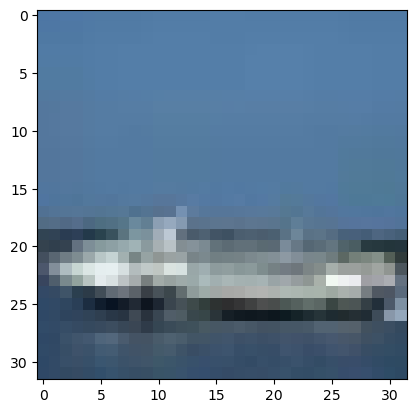

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Передбачений клас: корабель
Реальний клас: корабель
--------------------------------------------------


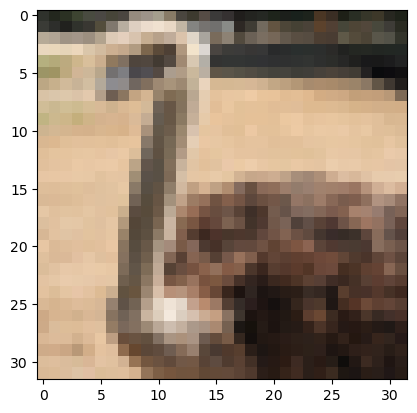

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Передбачений клас: кінь
Реальний клас: птах
--------------------------------------------------


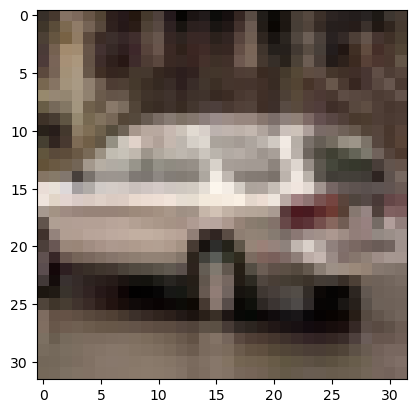

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Передбачений клас: автомобіль
Реальний клас: автомобіль
--------------------------------------------------


In [79]:
# Розпізнавання зображень з тестової вибірки

# Мітки класів CIFAR-10
labels = ['літак', 'автомобіль', 'птах', 'кіт', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

# Тестування 10 випадкових зображень
for i in range(10):
    index = np.random.randint(0, X_test.shape[0])
    test_image = X_test[index]
    
    # Візуалізація зображення
    plt.imshow(test_image)
    plt.show()

    # Додавання розміру партії для передбачення
    test_image = np.expand_dims(test_image, axis=0)

    # Передбачення класу
    predicted_class = loaded_model.predict(test_image)
    predicted_label = np.argmax(predicted_class)

    # Виведення передбаченого класу та реального класу
    print(f"Передбачений клас: {labels[predicted_label]}")
    print(f"Реальний клас: {labels[y_test[index][0]]}")
    print('-' * 50)

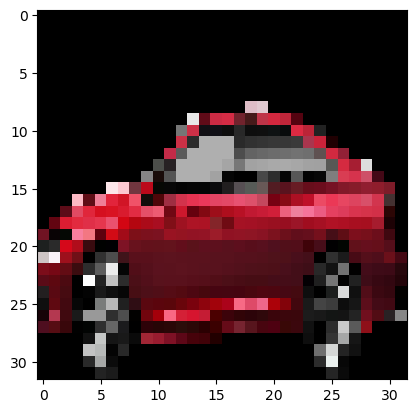

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Зображення: авто.jpg
Передбачений клас: автомобіль
--------------------------------------------------


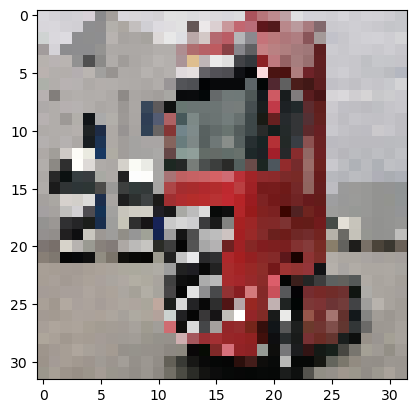

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Зображення: вантажівка.jpg
Передбачений клас: вантажівка
--------------------------------------------------


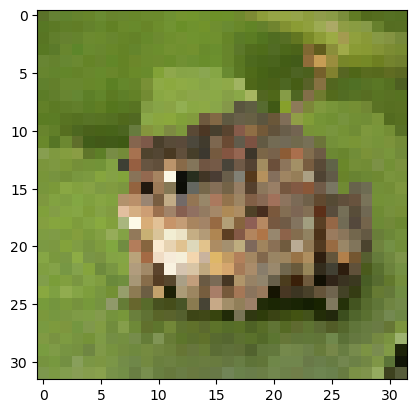

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Зображення: жаба.jpg
Передбачений клас: жаба
--------------------------------------------------


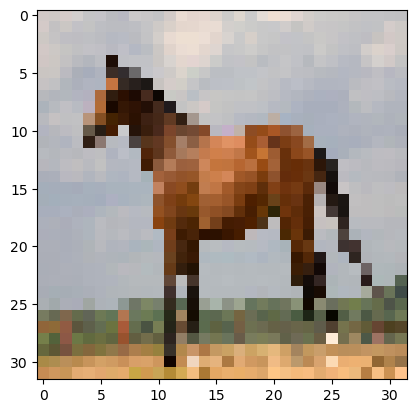

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Зображення: кінь.jpg
Передбачений клас: кінь
--------------------------------------------------


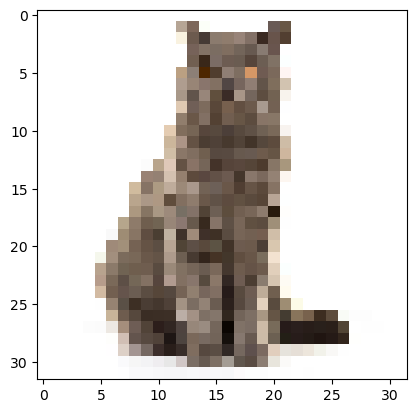

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Зображення: кіт.jpg
Передбачений клас: кіт
--------------------------------------------------


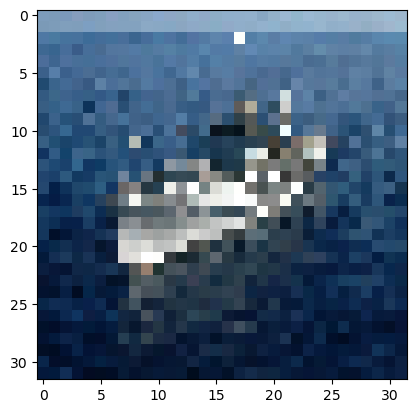

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Зображення: корабель.jpg
Передбачений клас: корабель
--------------------------------------------------


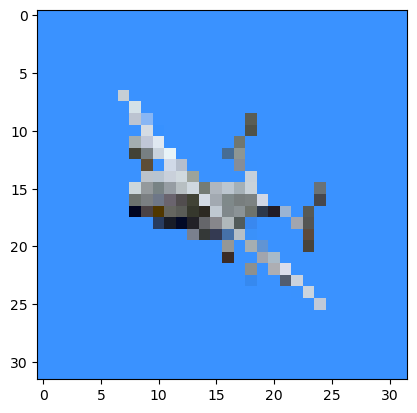

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Зображення: літак.jpg
Передбачений клас: літак
--------------------------------------------------


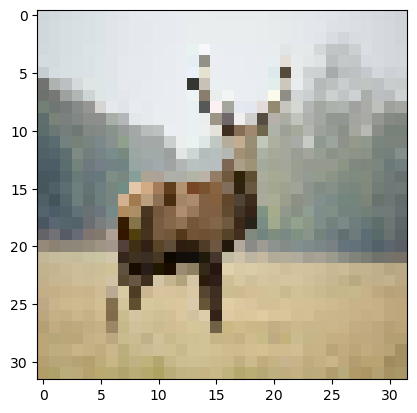

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Зображення: олень.jpg
Передбачений клас: олень
--------------------------------------------------


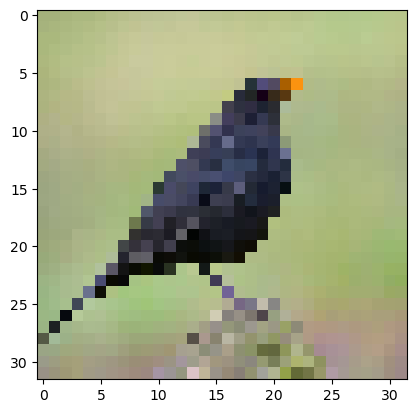

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Зображення: птах.jpg
Передбачений клас: птах
--------------------------------------------------


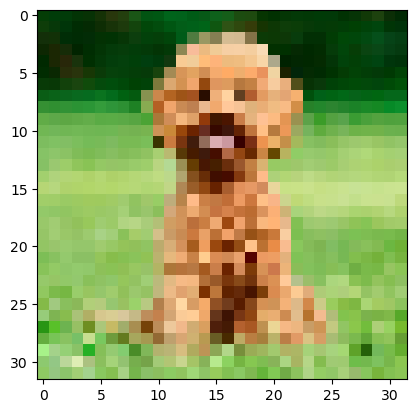

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Зображення: собака.jpg
Передбачений клас: собака
--------------------------------------------------


In [93]:
# Розпізнавання 10 зображень з інтернету

import os
from keras.preprocessing import image

# Шлях до папки зображень
folder_path = 'l4img'  # Змініть на шлях до вашої папки зображень

# Завантаження зображень із папки
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]

# Тестування 10 зображень з папки
for i in range(min(10, len(image_files))):
    # Повний шлях до зображення
    img_path = os.path.join(folder_path, image_files[i])

    # Завантаження зображення та зміна розміру до 32x32
    test_image = image.load_img(img_path, target_size=(32, 32))
    test_image = image.img_to_array(test_image)
    
    # Нормалізація зображення
    test_image = test_image.astype('float32') / 255.0

    # Візуалізація зображення
    plt.imshow(test_image)
    plt.show()

    # Додавання розміру партії для передбачення
    test_image = np.expand_dims(test_image, axis=0)

    # Передбачення класу
    predicted_class = loaded_model.predict(test_image)
    predicted_label = np.argmax(predicted_class)

    # Виведення передбаченого класу
    print(f"Зображення: {image_files[i]}")
    print(f"Передбачений клас: {labels[predicted_label]}")
    print('-' * 50)